In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')

In [3]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [6]:
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Change data type :-

In [11]:
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtype

dtype('int32')

# EDA

# On 'Gender' Basis :-

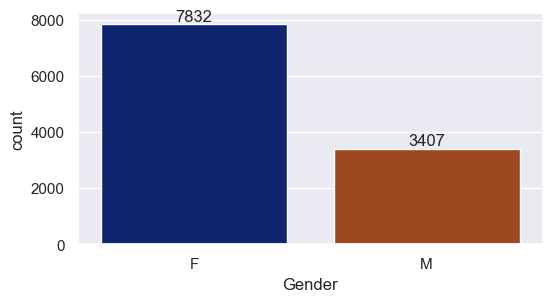

In [13]:
sns.set(rc = {'figure.figsize':(6,3)})
ax = sns.countplot(data = df,x = 'Gender', hue = 'Gender',palette = 'dark')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

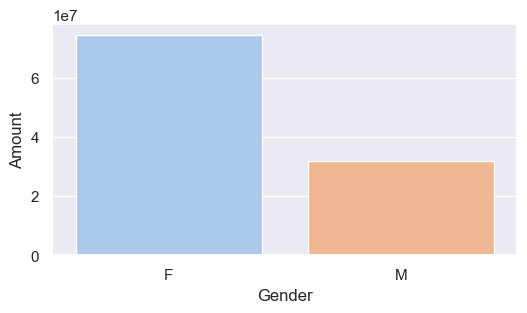

In [14]:
sns.set(rc = {'figure.figsize':(6,3)})
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',
                        ascending = False)
sns.barplot(x = 'Gender',y = 'Amount',data = sales_gen,hue = 'Gender',palette = 'pastel')

# From above graphs we can see that most of the buyers are females and even the purchaging power of females are greater than men.

# On 'Age' basis :-

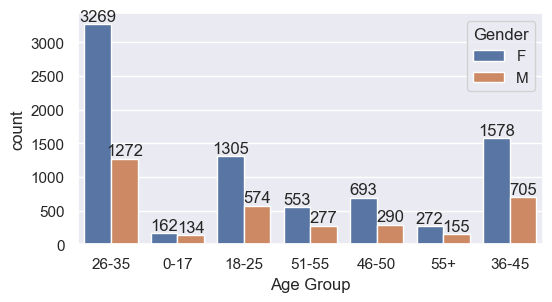

In [15]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

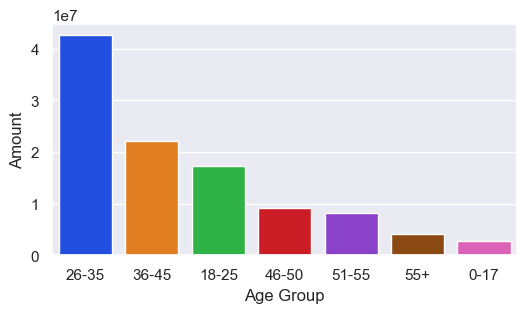

In [16]:
sales_age = df.groupby(["Age Group"], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, hue ='Age Group', palette = 'bright')
plt.show()

# From above graphs we can see the most of the buyers are age group between 26-35yrs female.

# On "State" basis :-

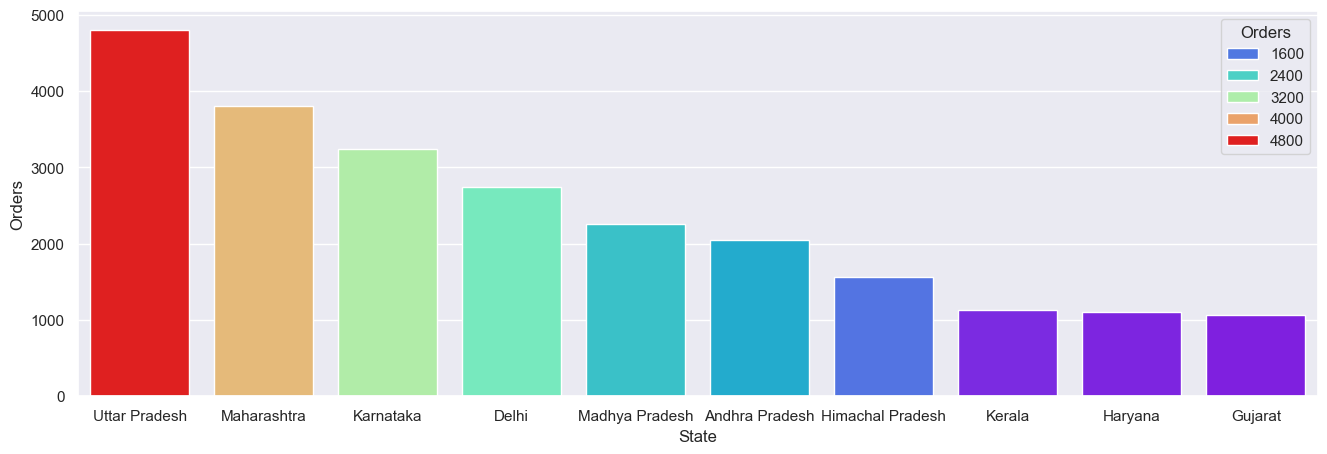

In [17]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders',hue = 'Orders',palette='rainbow')
plt.show()

# For amount/sales from to '10' States :- 

<Axes: xlabel='State', ylabel='Amount'>

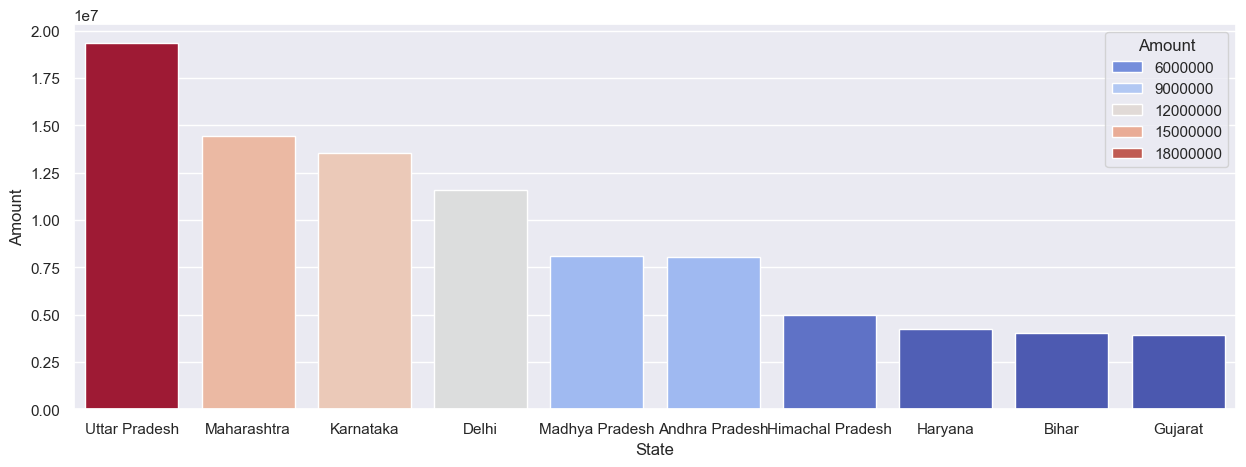

In [18]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount',hue = 'Amount',palette='coolwarm')

# From above graphs we can see that unexpextedly most of the orders are from UttarPradesh,Mharashtra and Karnataka respectively but total sales/amount is from UP, Karnataka and Maharashtra.

# On "Marital Status" basis :-

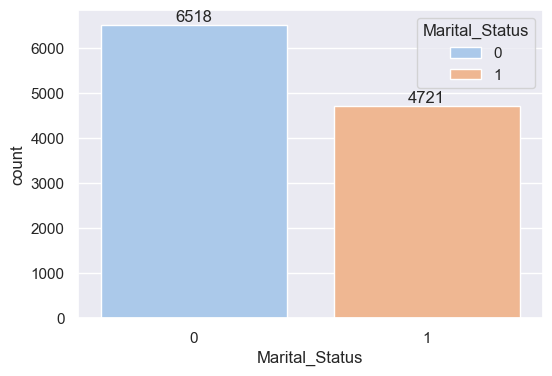

In [19]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(data = df, x = 'Marital_Status', hue = 'Marital_Status',palette = 'pastel')
for bars in ax.containers:
    ax.bar_label(bars)

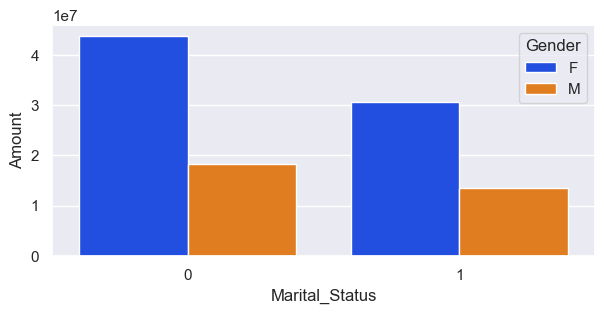

In [20]:
sales_status = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc = {'figure.figsize':(7,3)})
sns.barplot(data = sales_status,x = 'Marital_Status', y = 'Amount', hue = 'Gender',palette = 'bright')
plt.show()

# From above graps we can see that most of the buyers are married (women) and they have high purchasing power.

# Occupation:-

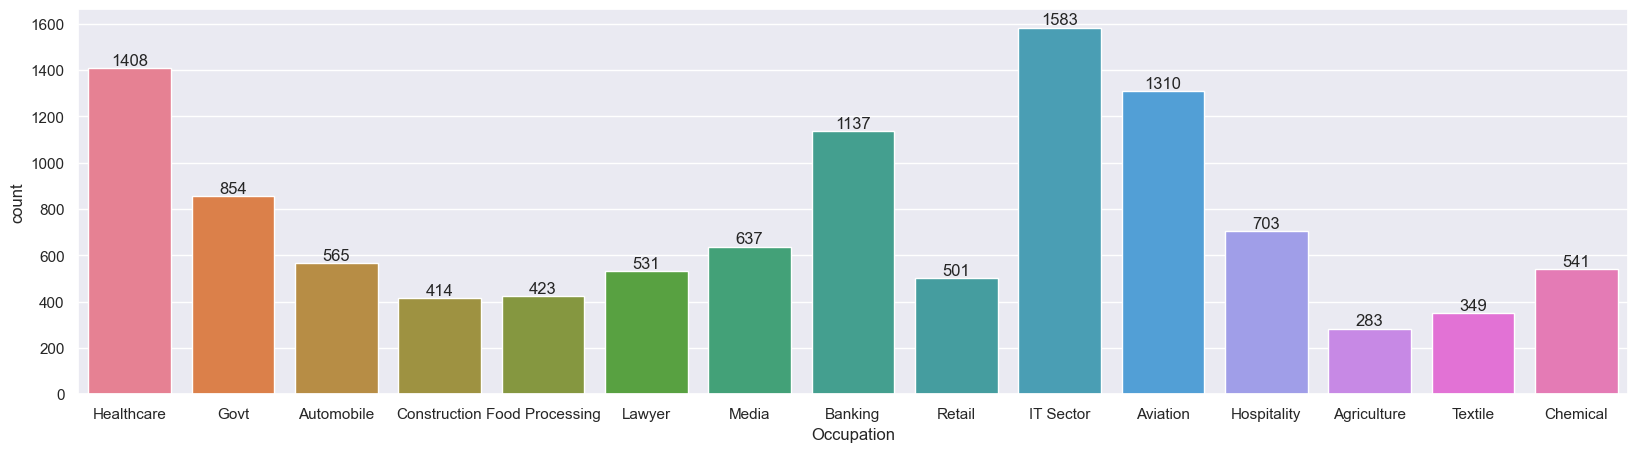

In [21]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = df , x = 'Occupation',hue = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

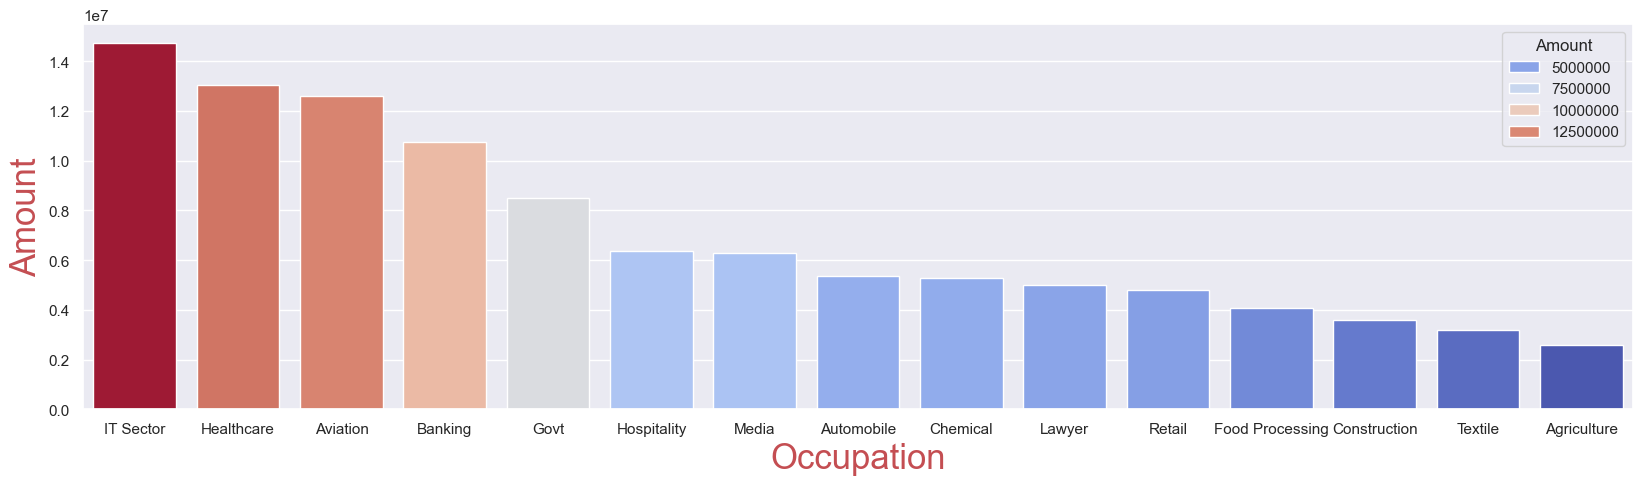

In [22]:
sales_sect = df.groupby(["Occupation"],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_sect, x = 'Occupation', y = 'Amount',hue = 'Amount',palette='coolwarm')
plt.xlabel("Occupation",size = 25,color = 'r')
plt.ylabel("Amount",size = 25,color = 'r')
plt.show()

# From above graphs we can see that most of the buyers are working IT, Aviation and Healthcare sector.

# Product Category :-

C:\Users\user\AppData\Local\Temp\ipykernel_3388\1526742065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_Category',palette = 'magma')


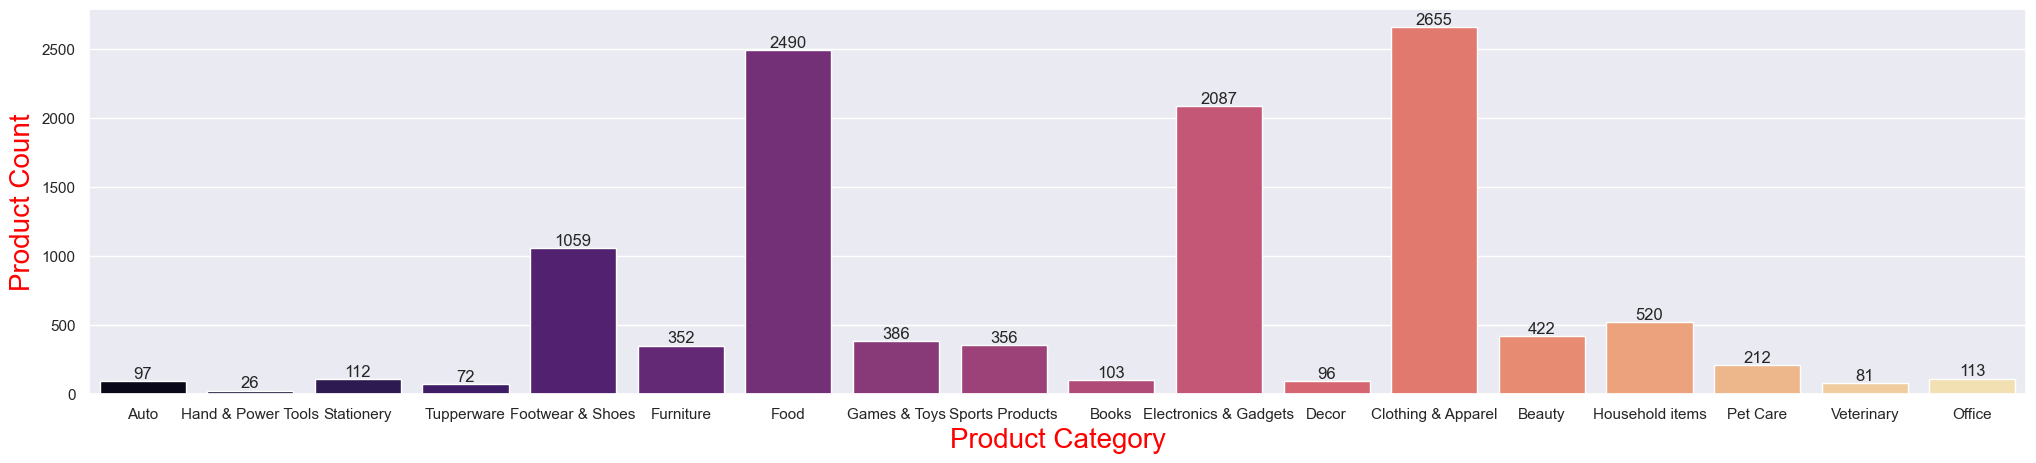

In [23]:
sns.set(rc = {'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category',palette = 'magma')
plt.xlabel("Product Category",size = 20,color = 'red')
plt.ylabel("Product Count",size = 20,color = 'red')
for bars in ax.containers:
    ax.bar_label(bars)

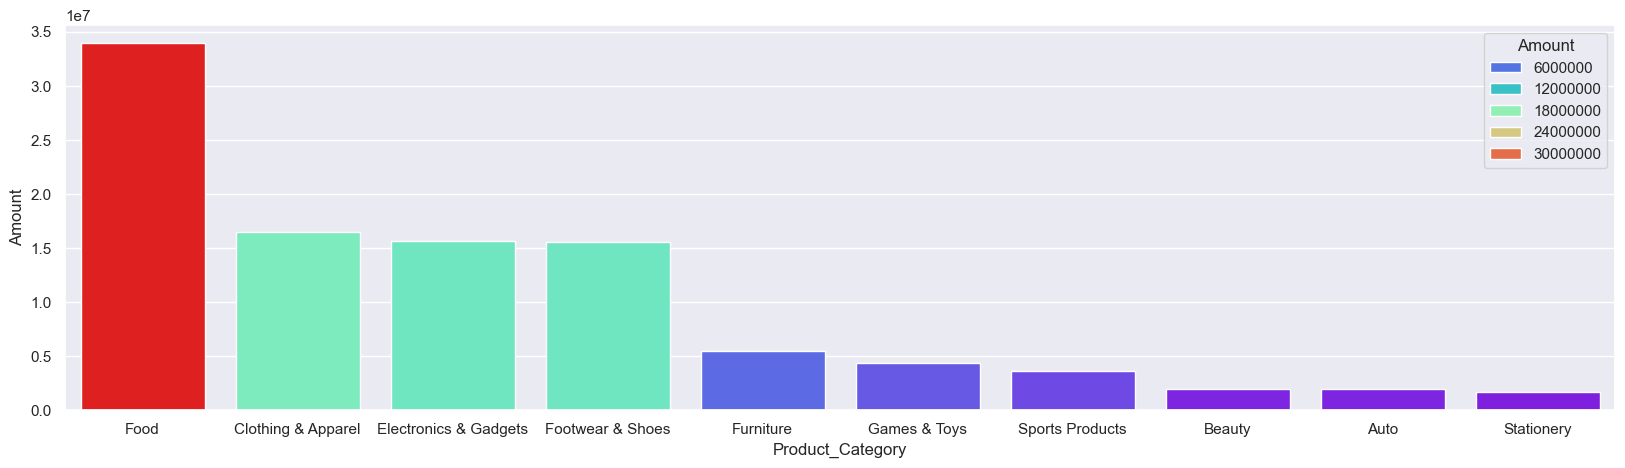

In [24]:
sales_prod = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(
                            by = 'Amount',ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_prod, x = 'Product_Category', y ='Amount',hue = 'Amount',palette = "rainbow")
plt.show()

# From above graphs we can see that most of the sold products are from Food,Clothing and Electronics category

# Top Selling Products :-

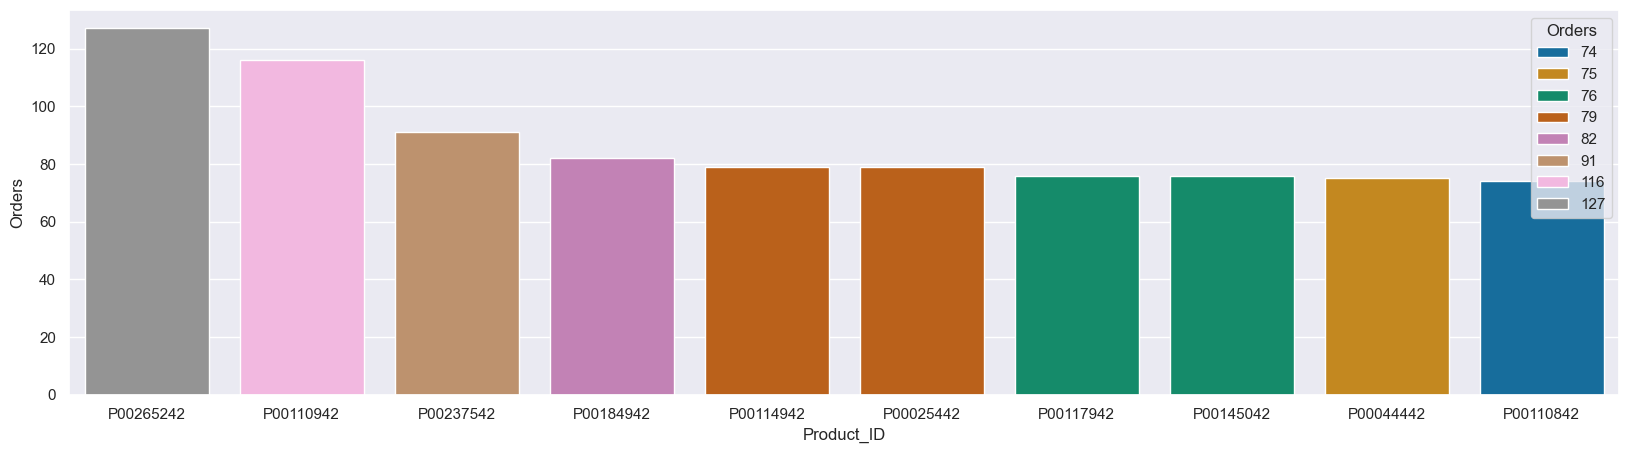

In [25]:
sales_top = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_top, x = 'Product_ID', y = 'Orders',hue ='Orders',palette = 'colorblind')
plt.show()

# Conclusion :-

  #    Married Women age group 26-35yrs from UP, Maharastra and Karnataka working in IT, Avition and Healthcare are more likely to buy products from Food, Clothing and Electronic category. 